## This Notebook is totally based on different Object Detection Techniques that we can impliment using opencv:💻

### Table of Topic:😎

1. Template Matching
2. Corner Detection 
    * Harris Corner Detection
    * Shi-Tomasi Corner Detection
3. Grid Detection
4. Edge detection
5. Contour Detection
6. Furier Transform
7. Face Detection with OpenCV Haar Cascade


## 1. Template Matching:
Template matching is one of the simplest forms of object detection. It is broadly used in the field of vehicle tracking, robotics, medical imaging, and manufacturing, etc. Using this process we find the image of the target object in a source image. 

<center><img src="https://i.imgur.com/DhCFx61.png" width="300px"></center>


It is a very computationally cost since the matching process involves moving the template image to all possible positions in a source image. when the sliding process of the template image on the source image there is comparison measurement that is done by calculating the similarity or the distance between both the images.
### Template Matching Measures:
In general, there are four methods that indicate the degree of similarity
* Measures of Match (similarity)
    1. Measures Based On Optimal Path Searching Techniques
    2. Euclidean Distance
    3. The Edit Distance
    4. Measures Based On Correlations 
* Measures of Mismatch (dissimilarity)
    1. Root mean square distance (RMS)
    2. Sum of absolute differences (SAD)
Most of the names are self-explanatory, if you don't feel so then it will be better if you look into [this link](https://www.slideshare.net/mustafasalam167/template-matching).

### Problems with template matching 
1. If the template is the smaller or rotated or translated version of the target image that is present in the source image then it will identify the matches. In this cases, we will be using multi-scale template matching or feature-based template matching. [Pyimagesearch has a brilliant article on that](https://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/).
2. This technique requires a separate template for each scale and orientation.
3. Template matching can be computationally expensive, especially for large templates.
4. It is Sensitive to noise and occlusions .


In this technique what happens is that the smaller image slides itself and scans the bigger image for finding the object that we require. Here, the smaller image is the target image that contains the object that we require and the bigger image is the image where we find our target image. 


In [1]:
# import cv2
# import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm
# %matplotlib inline

In [2]:
print(os.listdir("../input"))

['CV Object Detecton Dataset']


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Loading Images:


In [4]:
full = cv2.imread('../input/CV Object Detecton Dataset/gorilla.jpg')#LOADING THE IMAGE of SOURCE IMAGE
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)#CHANGING THE COLOR SPACE FROM BGR TO RGB

part = cv2.imread('../input/CV Object Detecton Dataset/gorilla_shorted.jpg')#LOADING THE IMAGE OF TEMPLATE IMAGE
part = cv2.cvtColor(part,cv2.COLOR_BGR2RGB)#CHANGING THE COLOR SPACE FROM BGR TO RGB

In [5]:
full.shape[::-1]

(3, 4898, 3265)

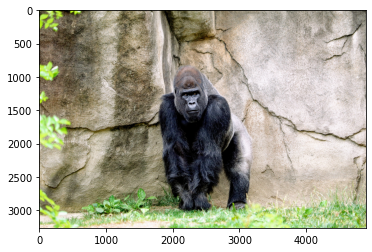

In [6]:
plt.imshow(full)#SOURCE IMAGE

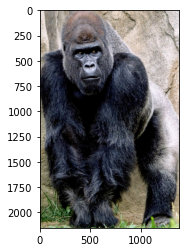

In [7]:
plt.imshow(part)#TEMPLATE IMAGE

In [8]:
'''

DIFFERENT METHODS AVAILABLE IN OPENCV 1ST IS COEFFICIENT BASED 3RD IS CORRELATION BASED 
5TH IS DIFFERENCE BASED AND 2ND,4TH AND 6TH ARE NORMALISED VERSION OF MENTIONED METHODS.

AS, 3RD METHOD IS DIFFERENCE BASED SO IT WILL GIVE THE REGION WHERE IT 
WILL FIND THE DIFFERENCE BETWEEN THE SOURCE AND TEMPLATE IS LESS.

SO,IT IS DIFFERENT THAN OTHE METHODS  

'''

methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

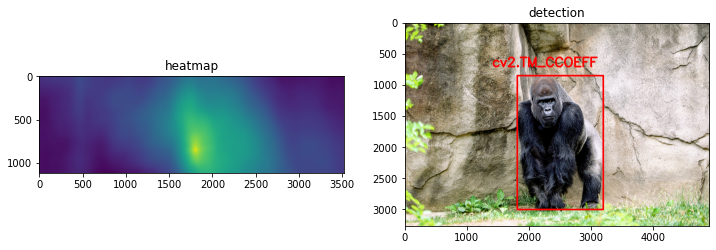

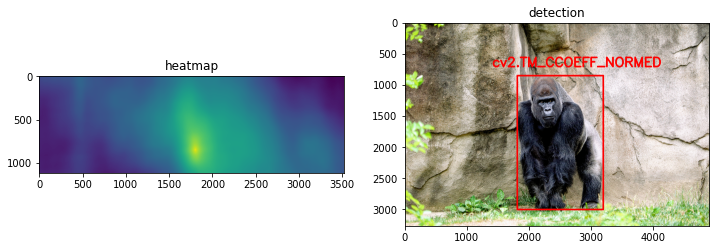

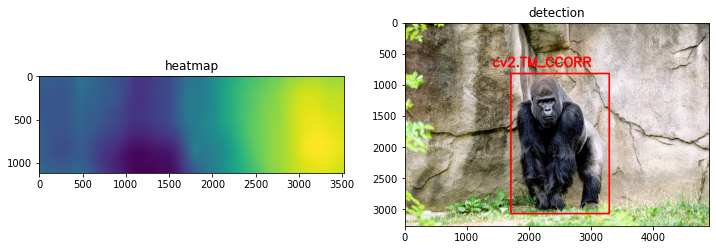

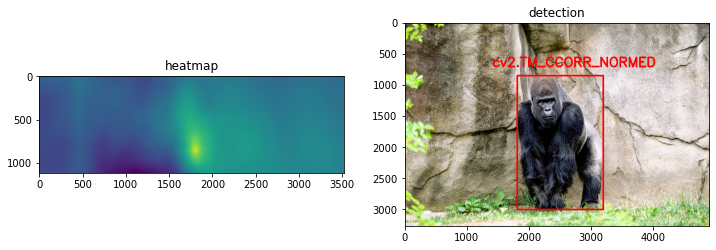

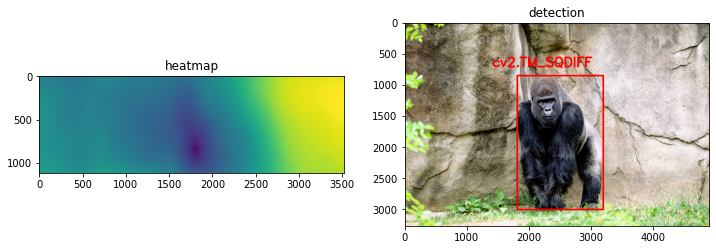

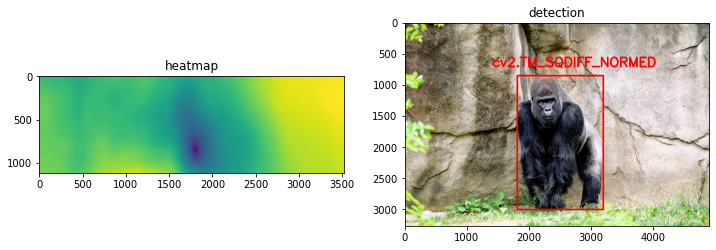

In [9]:
for i in methods:
    func = eval(i)# eval() makes any string to a function if it is present in th the module
    full_img = full.copy()
    
    res = cv2.matchTemplate(full_img,part,func)# THIS IS THE FUNCTION THAT WE USE TO DO THAT
    '''
    cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) the first parameter is the mainimage, 
    second parameter is the template to be matched and third parameter is the method used for matching.
    
    '''
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)#OUTPUT OF 'cv2.matchTemplate()' CONTAINS THE MIN,MAX VALUE AND THEIR LOCATION
    
    if i in ['cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']:
        '''
        AS IT IS A DIFFERENCE BASED METHOD
        '''
        top_left = min_loc
        height,width,channel = part.shape
        bot_right = (top_left[0]+width,top_left[1]+height)
    elif i in ['cv2.TM_CCORR']:
        '''
        IT WAS NOT SHOWING THE DESIRED OUTPUT THAT'S WHY I CUSTOMISED THAT IT IDENTIFY THE TEMPLATE IN SOURCE
        '''
        top_left = tuple(map(lambda i, j: i - j, min_loc, (-500,300)))
        height,width,channel = part.shape
        bot_right = (top_left[0]+width+200,top_left[1]+height+100)
    else:
        top_left = max_loc
        height,width,channel = part.shape
        bot_right = (top_left[0]+width,top_left[1]+height)
        
#     height,width,channel = part.shape
#     bot_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_img,top_left,bot_right,(255,0,0),25)#DRAWING RECTANGLE ON THE INDENTIFIED PORTION
    font = cv2.FONT_HERSHEY_SIMPLEX#PUTTING TEXT TO SHOW WHICH METHOD IS USED
    cv2.putText(full_img,text=i,org = (1400,700),fontFace=font,fontScale = 7,color = (255,0,0),thickness=25,lineType = cv2.LINE_AA)
    
    '''
    SHOWING THE OUTPUT👍
    
    '''
    plt.figure(figsize=(12,10))
    plt.subplot(121)
    plt.imshow(res)
    plt.title('heatmap')
    
    plt.subplot(122)
    plt.imshow(full_img)
    plt.title('detection')
    
#     plt.suptitle(i)
    plt.show()


### SAME THINGS HAS BEEN DONE FOR USING A SINGLE METHOD FOR TEMPLATE MATCHING!!!😎💻


In [10]:
full = cv2.imread('../input/CV Object Detecton Dataset/gorilla.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

part = cv2.imread('../input/CV Object Detecton Dataset/gorilla_shorted.jpg')
part = cv2.cvtColor(part,cv2.COLOR_BGR2RGB)

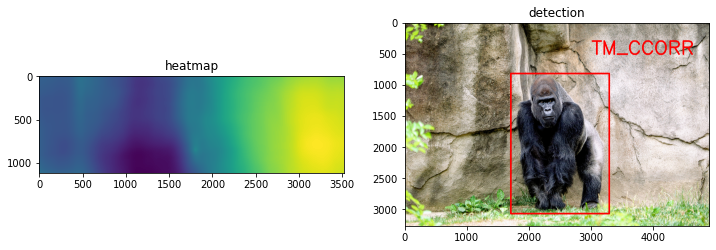

In [11]:
full_img = full.copy()

res = cv2.matchTemplate(full_img,part,cv2.TM_CCORR)
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
top_left = tuple(map(lambda i, j: i - j, min_loc, (-500,300)))
height,width,channel = part.shape
bot_right = (top_left[0]+width+200,top_left[1]+height+100)
cv2.rectangle(full_img,top_left,bot_right,(255,0,0),25)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(full_img,text='TM_CCORR',org = (3000,500),fontFace=font,fontScale = 10,color = (255,0,0),thickness=25,lineType = cv2.LINE_AA)

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(res)
plt.title('heatmap')

# plt.figure(figsize=(8,8))   
plt.subplot(122)
plt.imshow(full_img)
plt.title('detection')
    
# plt.suptitle('TM_CCOEFF')
plt.show()

### Template Matching with Multiple Objects:
Above we searched for the gorilla image which appears in the source image once. But, when try to find the object that has multiple occurance in the source image then  **cv2.minMaxLoc()** will not give all the location of the object. In that case we have to use Thresholding.

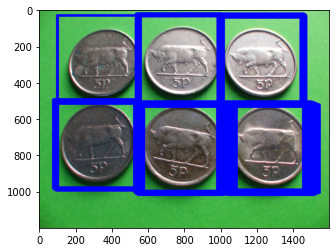

In [12]:
img_rgb = cv2.imread('../input/CV Object Detecton Dataset/source1.jfif')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('../input/CV Object Detecton Dataset/template1.jfif',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.42# THIS IS THE THRESHOLD FOR WHICH WE GOT EVERY COIN WHICH MATCHES THE TEMPLATE
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 10)

plt.imshow(img_rgb)

In [13]:
template1 = cv2.imread('../input/CV Object Detecton Dataset/template1.jfif')
sourcee = cv2.imread('../input/CV Object Detecton Dataset/source1.jfif')
sourcee.shape

(1200, 1600, 3)

In [14]:
template1 = cv2.resize(template1,(1600,1200))
template1.shape

(1200, 1600, 3)

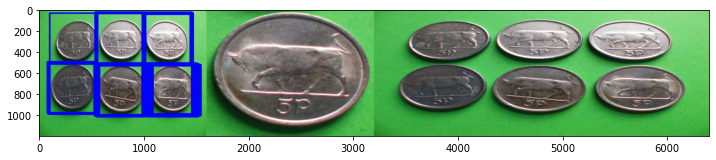

In [15]:

multiple_img = np.concatenate((img_rgb, template1), axis=1)
sourcee = cv2.resize(sourcee,(3200,1200))
multiple_img1 = np.concatenate((multiple_img,sourcee),axis=1)
# concat = np.concatenate((img_rgb,template),axis=1)
plt.figure(figsize=(12,14))
plt.imshow(multiple_img1)
plt.show()

## Corner Detection:

There is basically two well-known corner detection algorithm that are present in OpenCV one is Harris Corner Detection and another one is Shi-Tomasi Corner Detection. To understand these algorithms we need to first understand, what is a **corner**?
**A corner is a point whose local neighborhood stands in two dominant and different edge directions**.In simple words, Corner is the junction of two or more edges, where the edge is a sudden change in image brightness.
### Basic Intuition behind Harris Corner Detection and Shi-Tomasi Corner Detection:
Basically, both algorithm is same, moreover, shi-Thomas corner detection is the improved version of harris corner detection. Both algorithm based on the principle, which says that **if a window is placed on a corner of an image then the movement of the window in any direction will provide us large change in intensity**. So, in both algorithm there will be a kernel which will be sliding across the image and there will be a formula that will be calculating the change in intensity. 

<center><img src="https://i.imgur.com/jI63N0J.png" width="300px"></center>

> Image Source: https://www.southampton.ac.uk/~msn/book/new_demo/corners/.

#### Formula:
For a window(W) located at (X, Y) with pixel intensity I(X, Y), formula for both Corner Detection is –
> f(X, Y) = Σ (I(Xk, Yk) - I(Xk + ΔX, Yk + ΔY))2  where (Xk, Yk) ϵ W

If, both are using the same formula the where is the difference between them? As per the dates Harris Corner Detection got published on 1988 and J.Shi and C.Tomasi Corner Detection published their paper by the name 'Good Features to Track' in 1994. J.Shi and C.Tomasi made a small modification to the Harris Corner Detection which ended up with better results.
The modification was made on the scoring function-
* Harris corner detectior uses:
    * > R =  λ1,λ2 - k(λ1 - λ2)
* Shi-Tomashi corner detector uses :
    * > R = min(λ1, λ2)

Here, where λ1, λ2 are eigenvalues of resultant matrix and the number detected can be altered by varying the value of k.

#### Important Links:
1.https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
2. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html


## Harris Corner Detection

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
#STEP1: LOADING IMAGES
ches = cv2.imread('../input/CV Object Detecton Dataset/chess1.png')
ches = cv2.cvtColor(ches,cv2.COLOR_BGR2RGB)

wing = cv2.imread('../input/CV Object Detecton Dataset/wing_2.jfif')
wing = cv2.cvtColor(wing,cv2.COLOR_BGR2RGB)



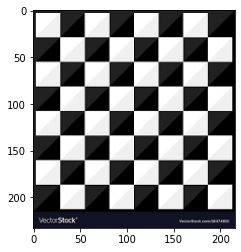

In [18]:
plt.imshow(ches)

In [19]:
gray = cv2.cvtColor(ches,cv2.COLOR_RGB2GRAY)#STEP2: CONVERTING TO GRAY SCALE

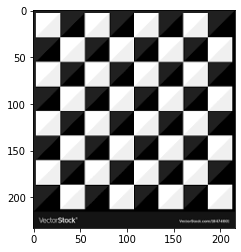

In [20]:
plt.imshow(gray,cmap='gray')

In [21]:
gray.shape

(233, 216)

In [22]:
gray_img = np.float32(gray)#STEP3: IT IS A IMPORTANT STEP WHERE WE ARE CONVERTING THE GRAY SCALED IMAGE IN FLOATING TYPE
dst = cv2.cornerHarris(gray_img,2,3,0.04)
'''
STEP4: USING CORNERHARRIS ALGORITHUM 
1ST ARGUMENT: Input Image,
2ND ARGUMENT: Neighborhood size,
3RD ARGUMENT: Aperture parameter for the Sobel() operator
4TH ARGUMENT: VALUE OF 'k'

YOU CAN PLAY AROUND THE 2ND TO 3RD ARGUMENTS TO GET YOUR DESIRED OUTPUT
'''

"\nSTEP4: USING CORNERHARRIS ALGORITHUM \n1ST ARGUMENT: Input Image,\n2ND ARGUMENT: Neighborhood size,\n3RD ARGUMENT: Aperture parameter for the Sobel() operator\n4TH ARGUMENT: VALUE OF 'k'\n\nYOU CAN PLAY AROUND THE 2ND TO 3RD ARGUMENTS TO GET YOUR DESIRED OUTPUT\n"

In [23]:
dst = cv2.dilate(dst,None)#YOU HAVE TO DILATE THE OUTPUT OF cv2.cornerHarris() TO VISUALIZE

In [24]:
# THRESHOLD IS APPLIED WHICH IS 1% OF THE MAX VALUE OF dst, THOSE POINTS
#WHICH ARE GREATER THAN THAT IS ASSIGNED THE VALUE RED, SO WE CAN VIEW THE POINTS
ches[dst>0.01*dst.max()] = [255,0,0]

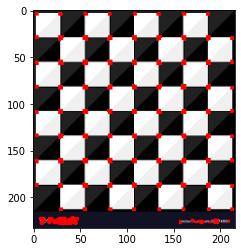

In [25]:
plt.imshow(ches)

#### Appling Corner Harris Algorithm on Wing.png image:

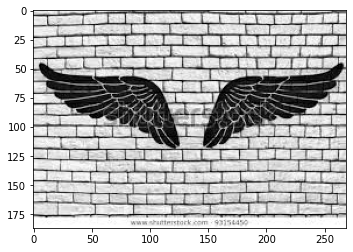

In [26]:
plt.imshow(wing)

In [27]:
wing_gray = cv2.cvtColor(wing,cv2.COLOR_RGB2GRAY)

In [28]:
wing_gray.shape

(187, 269)

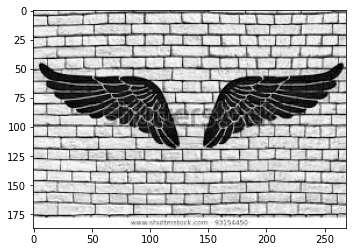

In [29]:
plt.imshow(wing_gray,cmap = 'gray')

In [30]:
wing_gray_img = np.float32(wing_gray)

In [31]:
dst1 = cv2.cornerHarris(src=wing_gray_img,blockSize = 2,ksize=3,k=0.04)

**We need to dilate the output of 'cv2.cornerHarris()' function for visualizing the output!!!**

In [32]:
dst1 = cv2.dilate(dst1,None)

In [33]:
wing[dst1>0.01*dst1.max()] = [255,0,0]

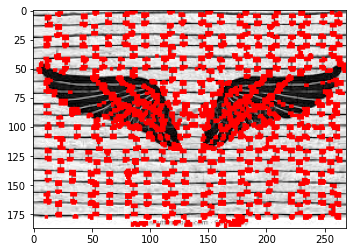

In [34]:
plt.imshow(wing)

### Shi-Tomasi Detection

In [35]:
#LOADING THE IMAGES
ches = cv2.imread('../input/CV Object Detecton Dataset/chess1.png')
ches = cv2.cvtColor(ches,cv2.COLOR_BGR2RGB)

wing = cv2.imread('../input/CV Object Detecton Dataset/wing_2.jfif')
wing = cv2.cvtColor(wing,cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(ches,cv2.COLOR_RGB2GRAY)
wing_gray = cv2.cvtColor(wing,cv2.COLOR_RGB2GRAY)

In [36]:
corners = cv2.goodFeaturesToTrack(gray,64,0.01,10)# APPLING THE ALGORITHM WICH IS NAMED BY THE NAME OF THE PAPER ITSELF

In [37]:
corners = np.int0(corners)

In [38]:
#EXTRACTING THE POINTS 
for i in corners:
    x,y = i.ravel()
    cv2.circle(ches,(x,y),3,(255,0,0),-1)# DRAWING CIRCLE USING THOSE POINTS

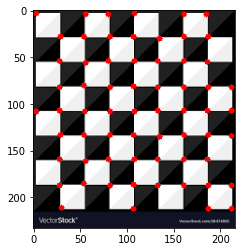

In [39]:
plt.imshow(ches)

### For Wing Image

In [40]:
corners1 = cv2.goodFeaturesToTrack(wing_gray,90,0.01,10)

In [41]:
corners1 = np.int0(corners1)

In [42]:
for m in corners1:
    x1,y1 = m.ravel()
    cv2.circle(wing,(x1,y1),3,(0,255,0),-1)

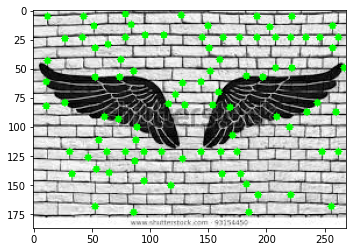

In [43]:
plt.imshow(wing)

## Canny Edge detection:
This algorithm is one of the most popular edge detection algorithums available in the computer vision community.Except that there are some gradient based algorithm Sobel-Feldman, Laplacian which helps us to detect edges.
#### There are some specific steps involved in the algorithm:
1. Apply gaussian filter to smooth the image in order toremove the noise.
2. Finding Intensity Gradient of the Image.specificlly we try to find both the value of the gradient and the direction of the gradient(or the direction of change). To do that it uses sobel edge detector.After that, the main edge detection starts.Allways remember Gradient direction is always perpendicular to edges.
3. Apply non-maximum suppression to get rid of spurious response to edge detection.The function of that step is same as it sounds. It checks wheather it is a local maximum in its neighborhood in the direction of gradient. After nonmaximum suppression, you'll get something called 'thin edges'.
4. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.See the image below,

<center><img src="https://i.imgur.com/IormJxR.png" width="200px"></center>

The edege 'A' is above the maxVal so it is a 'sure edge', though the edge 'B' is below maxVal it is connected to 'sure edge' so it is considered as a valid edge.But, as edge 'C' neither above maxVal nor connected to any 'sure edge' that's why it is considered as a 'weak edge'. So,by that we finally get the strong edges in the image.

#### Guideline:
1. OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: **Edge_Gradient(G) = |G_x| + |G_y|**. By default, it is False.
2. For high resolution images where you only want general edges, it is usually a good idea to apply a custom blur.
3. The canny algo. also requires a user to decide on low and high threshold values.There are some equestions mentioned in the code which helps to find that.
4. In most of the cases we need to experiment with different values to get the desired output.

#### Important Links:

1. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html


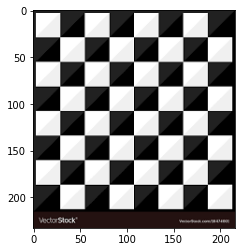

In [44]:
#LOADING AND SHOWING IMAGE
edge_img = cv2.imread('../input/CV Object Detecton Dataset/chess1.png')
plt.imshow(edge_img)

In [45]:
edge = cv2.Canny(edge_img,0,255)#APPLYING THE ALGORITHM

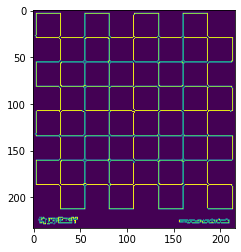

In [46]:
plt.imshow(edge)#SHOWING THE IMAGE

### With Blur

In [47]:
med_val = np.median(edge_img)

In [48]:
upper = int(min(255,1.3*med_val))#ABOVE MENTIONED FORMULA FOR CLACULATING UPPER THRESHOLD
lower = int(min(0,0.7*med_val))#ABOVE MENTIONED FORMULA FOR CLACULATING LOWER THRESHOLD

In [49]:
blurred_img = cv2.blur(edge_img,ksize = (5,5))#BLURING THE IMAGE

In [50]:
edge = cv2.Canny(blurred_img,lower,upper+60)# APPLYING THE ALGO

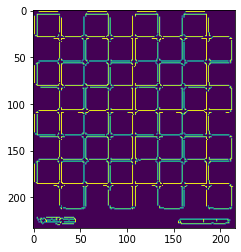

In [51]:
plt.imshow(edge)#WE HAVE NOT GOT THE DESIRED OUTPUT BECAUSE THERE IS NO NOISE IN THE IMAGE.

### Without Blurring

In [52]:
edge = cv2.Canny(edge_img,lower,upper+450)

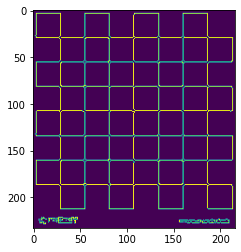

In [53]:
plt.imshow(edge)#BETTER OUTPUT

### on face

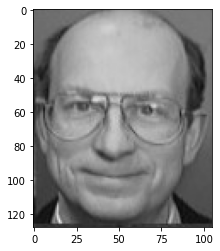

In [54]:
edge_img1 = cv2.imread('../input/CV Object Detecton Dataset/SharedScreenshot1.jpg')
plt.imshow(edge_img1)

### With Blurring

In [55]:
med_val1 = np.median(edge_img1)

In [56]:
upper1 = int(min(255,1.3*med_val1))
lower1 = int(min(0,0.7*med_val1))

In [57]:
blurred_img1 = cv2.blur(edge_img1,ksize = (5,5))

In [58]:
edge1 = cv2.Canny(blurred_img1,lower1,upper1+60)

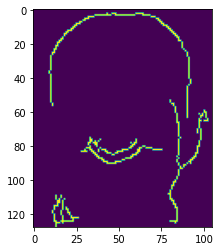

In [59]:
plt.imshow(edge1)# CAN BE TUNED

### Without Blurring

In [60]:
edge_not_blur = cv2.Canny(edge_img1,upper1+130,lower1+60)

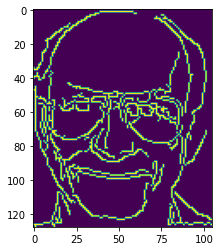

In [61]:
plt.imshow(edge_not_blur)#ALMOST DESIRED OUTPUT

In [62]:
lower1

0

### Corner detection part-II & Camera Calibration:
There are some built-in functions in OpenCV that helps to find corners even when the image is distorted due to different reasons. The most happening distortions are radial distortion and tangential distortion if you remember these were mentioned in our 12th physics books in optics chapters. The whole thing is part of camera calibration. Camera calibration means mapping or transformation of the 3D points(points are related to an object, whose pic we are taking) in the 2D coordinate. And as these translations are not perfect enough that's why we get those errors or distortions.

<center><img src="https://i.imgur.com/9AyVpqO.png" width="400px"></center>

1. **Radial Distortion:** 
    Radial Distortion is the most common type that affects the images, In which when a camera captured pictures of straight lines appeared slightly curved or bent.

<center><img src="https://i.imgur.com/TIXWO3Q.png" width="400px"></center>

2. **Tangential distortion:** 
    Tangential distortion occurs mainly because the lens is not parallelly aligned to the imaging plane, which makes the image to be extended a little while longer or tilted, it makes the objects appear farther away or even closer than they actually are.

<center><img src="https://i.imgur.com/Dg34LU4.png" width="400px"></center>

So, to remove this sort of distortions we need to find distortion parameters and intrinsic and extrinsic parameters of a camera. And removing distortion must be our first step before going ahead with any kind of processing or analysis of the image. To find all these parameters and remove distortion, what we have to do is to provide some sample images of a well-defined pattern (eg, chessboard). We find some specific points in it (square corners in chessboard). We know its coordinates in real-world space and we know its coordinates in the image. With these data, some mathematical problem is solved in the background to get the distortion coefficients. That is the summary of the whole story. For better results, we need at least 10 test patterns.

<center><img src="https://i.imgur.com/E2yi0jU.png" width="400px"></center>
* 

So, to find the pattern in a chessboard we need to use the builtin function of OpenCV called  `cv2.findChessboardCorners()`. we pass the arguments like-the image where we want to find the patterns, what is the size of the pattern like 8x8 or7x7 etc. and corners Output array of detected corners(you can pass it None or leave that as it is if you don't know). Instead of the chessboard, we can use some circular grid but then use the function `cv2.findCirclesGrid()` to find the pattern. It is said that fewer images are enough when using a circular grid. use `Shift+Tab` to know about the arguments.

I tried `cv2.cornerSubPix()` for more accuracy as per the documentation but I could not obtain the desired output. If you can comment down below.

#### Important Links & Image Source:
1. https://medium.com/analytics-vidhya/camera-calibration-with-opencv-f324679c6eb7
2. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html

In [63]:
# grid1 = cv2.imread('left14.jpg')
# gray1 = cv2.cvtColor(grid1,cv2.COLOR_BGR2GRAY)

# objp = np.zeros((6*7,3), np.float32)
# objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# objpoints1 = []
# imgpoints1 = []
# ret1,cor1 = cv2.findChessboardCorners(grid1,(7,7))
# if ret1 == True:
#         objpoints1.append(objp)

#         corners2 = cv2.cornerSubPix(gray1,cor1,(11,11),(-1,-1),criteria)
#         imgpoints1.append(corners2)

#         # Draw and display the corners
#         grid_copy1 = grid1.copy()
#         grid_copy1 = cv2.drawChessboardCorners(grid_copy1, (7,6), corners2,ret1)
# # grid_copy = grid.copy()
# # cv2.drawChessboardCorners(grid_copy,(7,7),cor,found)
#         plt.imshow(grid_copy1)


In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [65]:
grid = cv2.imread('../input/CV Object Detecton Dataset/flat_board.png')#LOADING IMAGE

In [66]:
type(grid)

numpy.ndarray

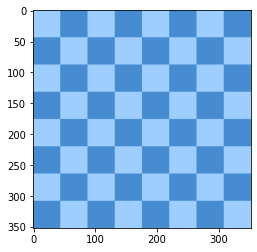

In [67]:
plt.imshow(grid)

In [68]:
found,cor = cv2.findChessboardCorners(grid,(7,7))#APPLYING THE ALGO

In [69]:
found

True

In [70]:
grid_copy = grid.copy()
cv2.drawChessboardCorners(grid_copy,(7,7),cor,found)#DRAWING THE CORNERS ON THE COPY OF THE IMAGE

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

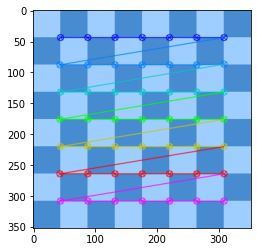

In [71]:
plt.imshow(grid_copy)#SHOWING THE IMAGE

### Using Dot_Grid image:

In [72]:
dot = cv2.imread('../input/CV Object Detecton Dataset/dot_grid.png')#loading the image

In [73]:
type(dot)

numpy.ndarray

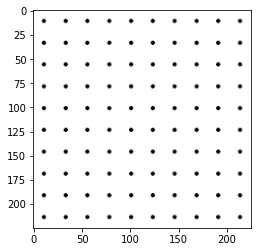

In [74]:
plt.imshow(dot)#showing the image

In [75]:
found1,cor1 = cv2.findCirclesGrid(dot,(10,10),cv2.CALIB_CB_ASYMMETRIC_GRID)#APPLYING THE ALGO AS MENTIONED ABOVE

In [76]:
found1

True

In [77]:
cv2.drawChessboardCorners(dot,(10,10),cor1,found1)# DRAWING CORNERS

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

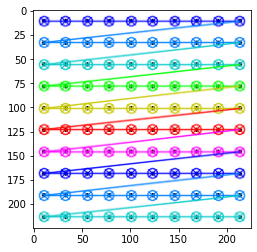

In [78]:
plt.imshow(dot)#SHOWING THE OUTPUT

### Contour Detection: 
 Contour detection is a useful tool for shape analysis, object detection, and recognition. There are so many functions for doing contour detection, but I have done  Contour Detection in a getting started perspective.
 
 <center><img src="https://i.imgur.com/PHaWsPa.jpg" width="500px"></center>
 
#### What is Contour?
Contours are defined as simply a curve joining all the continuous points(along the boundary), having the same color or intensity. In simple it means a closed curve.I used `cv2.findContours()` for finding contours and `cv2.drawContours()` for drawing the contours.
#### Guide:
1. `cv2.findContours()` Finds contours in a binary image so, before passing any image directly one should apply thresholding or canny edge detection on it.
2. Try to use a copy of the original image as `cv2.findContours()` modifies the input image.
3. As the 2nd argument, we can use  `cv2.RETR_LIST`,`cv2.RETR_TREE` or `cv2.RETR_EXTERNAL` any one of them. I tried the first two but both gave me approximately the same result but, I did not try the last one, I guess it will be the same too.
4. Try to use `cv2.CHAIN_APPROX_NONE` it will give you the whole contour but `cv2.CHAIN_APPROX_SIMPLE` give only a few points of the respective contours by that way it saves memory too.
5. If there is noise in the background feel free to remove them but, do not blur it so much it might affect the detection.

#### Important Links:
1. https://www.thepythoncode.com/article/contour-detection-opencv-python

### Using pice of paper image

In [79]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [80]:
image = cv2.imread("../input/CV Object Detecton Dataset/leaf.jfif")


In [81]:
type(image)

numpy.ndarray

In [82]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

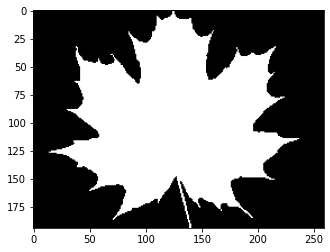

In [83]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

In [84]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

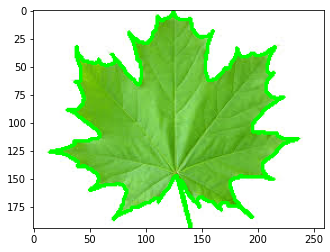

In [85]:
# show the image with the drawn contours
plt.imshow(image)
plt.show()

## Fourier Transform:
#### What is Fourier Transform?:
In general Fourier Transform says that
> Any periodic function can be represented as a weighted sum of sins and cosines.

The Fourier Transform is an important image processing tool which is used to decompose an image into its sine and cosine components. The output of the transformation represents the image in the Fourier or frequency domain, while the input image is the spatial domain equivalent. In the Fourier domain image, each point represents a particular frequency contained in the spatial domain image. It is very helpful for object detection, you can understand by the below code. You will find that every 'A','C' is following a special pattern when Fourier Transform is applied to it through both fonts of both 'A' and both 'C' is different.

<center><img src="https://i.imgur.com/qPA6X7x.jpg" width="300px"></center>

The Fourier Transform is used in a wide range of applications, such as image analysis, image filtering, image reconstruction, and image compression.


* Spatial Domain:
> This concept is used most often when discussing the frequency with which image values change, that is, over how many pixels does a cycle of periodically repeating intensity variations occur. One would refer to the number of pixels over which a pattern repeats (its periodicity) in the spatial domain.

* Frequency Domain:
>The frequency domain is a space in which each image value at image position F represents the amount that the intensity values in the image I vary over a specific distance related to F. In the frequency domain, changes in image position correspond to changes in the spatial frequency, (or the rate at which image intensity values) are changing in the spatial domain image I. For example, suppose that there is the value 20 at the point that represents the frequency 0.1 (or 1 period every 10 pixels). This means that in the corresponding spatial domain image I the intensity values vary from dark to light and back to dark over a distance of 10 pixels and that the contrast between the lightest and darkest is 40 gray levels (2 times 20).

[Source](http://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm)
#### Important Links:
1. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
2. https://dsp.stackexchange.com/questions/1637/what-does-frequency-domain-denote-in-case-of-images

In [86]:
#LOADING IMAGE
furier = cv2.imread('../input/CV Object Detecton Dataset/a_0.png',cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(furier)#MAIN STEP1 PASSING THE IMAGE TO fast Fourier Transform function (FFT)
fshift = np.fft.fftshift(f)# MAIN STEP2 PASSING THE OUTPUT OF FFT IN np.fft.fftshift()
magnitude_spectrum = 20*np.log(np.abs(fshift))#MAIN STEP3, THESE THREE STEPS WILL BE SAME FOR EVERYTIME
magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)
img_and_magnitude = np.concatenate((furier, magnitude_spectrum), axis=1)

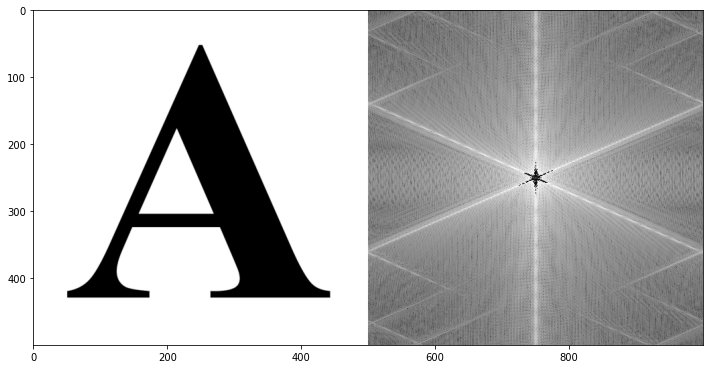

In [87]:
#SHOWING THE OUTPUT
plt.figure(figsize=(12,8))
plt.imshow(img_and_magnitude,cmap='gray')
plt.show()

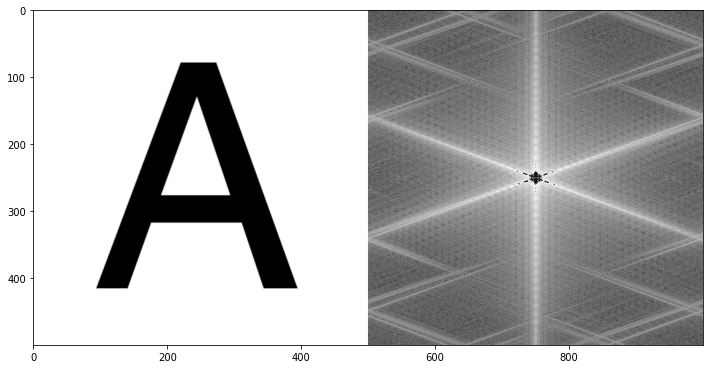

In [88]:
furier = cv2.imread('../input/CV Object Detecton Dataset/a_1.png',cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(furier)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)
img_and_magnitude = np.concatenate((furier, magnitude_spectrum), axis=1)

plt.figure(figsize=(12,8))
plt.imshow(img_and_magnitude,cmap='gray')
plt.show()

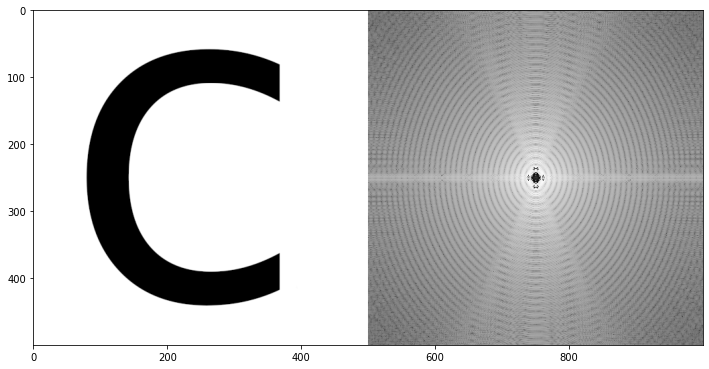

In [89]:
furier = cv2.imread('../input/CV Object Detecton Dataset/c_0.png',cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(furier)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)
img_and_magnitude = np.concatenate((furier, magnitude_spectrum), axis=1)

plt.figure(figsize=(12,8))
plt.imshow(img_and_magnitude,cmap='gray')
plt.show()

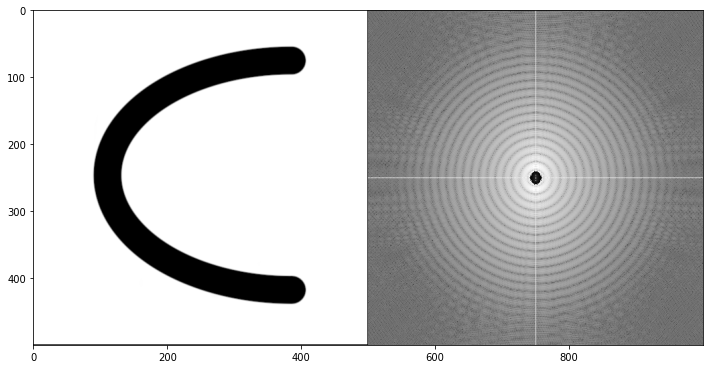

In [90]:
furier = cv2.imread('../input/CV Object Detecton Dataset/c_1.png',cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(furier)#MAIN STEP1 PASSING THE IMAGE TO fast Fourier Transform function (FFT)
fshift = np.fft.fftshift(f)# MAIN STEP2 PASSING THE OUTPUT OF FFT IN np.fft.fftshift()
magnitude_spectrum = 20*np.log(np.abs(fshift))#MAIN STEP3, THESE THREE STEPS WILL BE SAME FOR EVERYTIME
magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)
img_and_magnitude = np.concatenate((furier, magnitude_spectrum), axis=1)

#SHOWING OUTPUT
plt.figure(figsize=(12,8))
plt.imshow(img_and_magnitude,cmap='gray')
plt.show()

### Haar cascade face detection:
Haar cascade is a kind of classifier which helps us to classify objects. This method of using a haar cascade classifier is proposed by Paul Viola and Michael Jones in their paper Rapid Object Detection using a Boosted Cascade of Simple Features. By using these we only can detect objects, we can't identify any particular object(like in case of face recognition, to whom that particular face belongs to).
#### How it works?
So, what defines a human face? The answer would be its features and the features would be like- nose, eyes, lips, cheeks, eyebrows, etc. so, to detect face we need to detect these. And this is gonna happen with the help of Haar Features. Haar Features are a sequence of rescaled square-shaped functions. It was proposed by Alfred Haar in 1909 they are basically black and white kernels. They look like these,



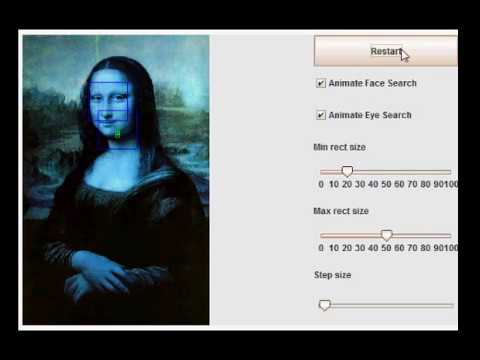

In [91]:
from IPython.display import YouTubeVideo
YouTubeVideo('nVbaNcRldmw')
# https://youtu.be/nVbaNcRldmw


There are different Haar Features for detecting different face features, like edge features can be used for detecting eyebrows, lips, etc. then line features can be used for detecting nose, eyes etc.see the image below,
<center><img src="https://i.imgur.com/l3EGRWh.jpg" width="300px"></center>> But among all these features we calculated, most of them are irrelevant. For example, consider the image below. The top row shows two good features. The first feature selected seems to focus on the property that the region of the eyes is often darker than the region of the nose and cheeks. The second feature selected relies on the property that the eyes are darker than the bridge of the nose. But the same windows applying on cheeks or any other place is irrelevant. So how do we select the best features out of 160000+ features? It is achieved by Adaboost.
<center><img src="https://i.imgur.com/QhkUDxY.png" width="300px"></center>
#### Different Steps of the Algorithm:
1. It needs an image with a suspected object
2. It will make the image grayscale because we need to use Haar Features.
3. It will start with any one of the  Haar Features for detecting a specific region and after it finishes then, another feature will start detecting a specific region and it goes up to 6K features. That kernel will slide around the whole image and calculate Δ. if the value of it is close to 1 then the algorithm will conform to presence of that specific features.

<center><img src="https://i.imgur.com/Vb6QAdl.png" width="300px"></center>


4. For reducing the complexity of the operations from O(N^2) it uses the Integral image concept which takes the complexity factor to O(1).

<left><img src="https://i.imgur.com/gTDIStk.png" width="300px"></center>
<right><img src="https://i.imgur.com/3mgdWtg.png" width="300px"></center>

5. The final classifier is a weighted sum of these weak classifiers. It is called weak because it alone can’t classify the image, but together with others forms a strong classifier. The paper says even 200 features provide detection with 95% accuracy. Their final setup had around 6000 features. (Imagine a reduction from 160000+ features to 6000 features. That is a big gain).

I am gonna write an article addressing how to create a Haar cascade classifier Using the famous GUI tool `Cascade Trainer GUI`. It is very easy to use but most of the cases people get error like- `OpenCV Error : Bad argument(Can not get new positive sample.The most possible reason is insufficient count of samples in given vec - file.) in CvCascadeImageReader::PosReader::get,file\path_to_opencv\apps\traincascade\imagestorage.cpp, line X` . So, I am gonna address these sorts of errors and how to tune the parameters available there.

#### Important Links:
1. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html
2. https://medium.com/@krsatyam1996/haar-cascade-face-identification-aa4b8bc79478


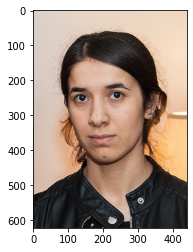

In [92]:
#LOADING THE IMAGE

nadia = cv2.imread('../input/CV Object Detecton Dataset/Nadia.jpg')
face_color1 = cv2.cvtColor(nadia,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(nadia,cv2.COLOR_BGR2GRAY)
# blurrr = cv2.GaussianBlur(gray,(35,35),0)
plt.imshow(face_color1)


In [93]:
# Read in the cascade classifiers for face and eyes 

dog_face = cv2.CascadeClassifier('../input/CV Object Detecton Dataset/haarcascade_frontalface_default.xml')
eye = cv2.CascadeClassifier('../input/CV Object Detecton Dataset/haarcascade_eye.xml')

In [94]:
# create a function to detect face AND DRAWING RECTANGLE AROUND THE FACE

def detect_face(img):
    face_img = img.copy()
    face_gray = cv2.cvtColor(face_img,cv2.COLOR_BGR2GRAY)
    face_rects = dog_face.detectMultiScale(face_img)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        roi_gray = face_gray[y:y+h,x:x+w]
        roi_color = face_img[y:y+h,x:x+w]
        eye_rects = eye.detectMultiScale(roi_gray)
        for(x1,y1,w1,h1) in eye_rects:
            cv2.rectangle(roi_color,(x1,y1),(x1+w1,y1+h1),(255,255,255),10)
        
        return face_img

In [95]:
re = detect_face(face_color1)

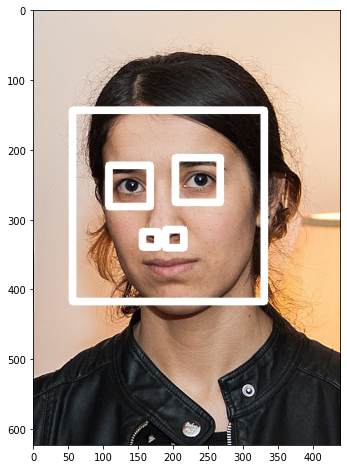

In [96]:
#SHOWING THE OUTPUT
plt.figure(figsize=(12,8))
plt.imshow(re)
plt.show()

In [97]:
#LOADING THE IMAGE
face = cv2.imread('../input/CV Object Detecton Dataset/solvay.jpg')
fece_color = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
# blurrr = cv2.GaussianBlur(gray,(35,35),0)
# plt.imshow(gray,cmap='gray')


In [98]:
# Read in the cascade classifiers for face and eyes 

face_cascade = cv2.CascadeClassifier('../input/CV Object Detecton Dataset/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../input/CV Object Detecton Dataset/haarcascade_eye.xml')

In [99]:
face1 = face_cascade.detectMultiScale(gray1,1.3,5)#FACE COORDINATES ARE CALCULATED USING "face_cascade.detectMultiScale()"
#DRAWING THE RECTANGLE FOR FACE AND EYES
for (x,y,w,h) in face1:
    cv2.rectangle(fece_color,(x,y),(x+w,y+h),(255,0,0),10)
    roi_gray1 = gray1[y:y+h,x:x+w]
    roi_color1 = fece_color[y:y+h,x:x+w]
    eyes1 = eye_cascade.detectMultiScale(roi_gray1)
    for (ex,ey,ew,eh) in eyes1:
        cv2.rectangle(roi_color1,(ex,ey),(ex+ew,ey+eh),(0,255,0),10)

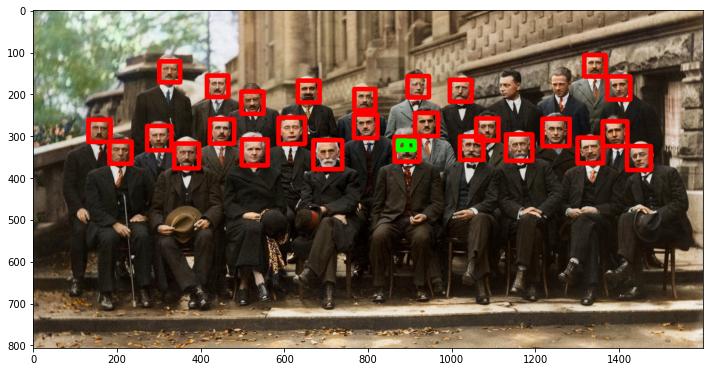

In [100]:
#SHOWING THE OUTPUT
plt.figure(figsize=(12,8))
plt.imshow(fece_color)
plt.show()

In [101]:
print('Faces Found:{}'.format(len(face1)))# NUMBER OF FACES FOUND

Faces Found:27
